In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

## Upload Data

In [2]:
data=pd.read_csv(r"C:\Users\Ahmed\Downloads\Country k_means data\Country-data.csv")

## Eplore Data


In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.shape

(167, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Create Model

In [7]:
df=data.drop("country",axis=1)

In [8]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [9]:
Scal_df=StandardScaler().fit_transform(df)

In [10]:
Scal_df

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [11]:
inertia=[]
k=range(1,10)

for i in k:
    km=KMeans(n_clusters=i)
    km.fit_transform(Scal_df)
    inertia.append(km.inertia_)
   

Text(0.5, 1.0, 'Elbow Method For Optimal k')

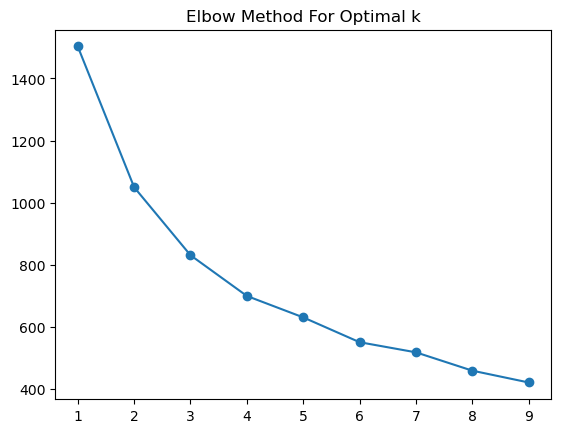

In [12]:
plt.plot(k,inertia,"o-")
plt.title("Elbow Method For Optimal k")


In [13]:
km=KMeans(n_clusters=7,random_state=42)
km.fit_transform(Scal_df)
km.inertia_

495.323382595192

In [14]:
labels=km.labels_
data['target']=labels

In [15]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,target
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,6
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,6
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [16]:
data[data['country']=="Egypt"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,target
47,Egypt,29.1,21.3,4.66,26.6,9860,10.1,70.5,3.19,2600,0


In [17]:
data['country'][data['target']==0]

2                 Algeria
5               Argentina
6                 Armenia
9              Azerbaijan
12             Bangladesh
19                Bolivia
21               Botswana
22                 Brazil
34                  China
35               Colombia
45     Dominican Republic
46                Ecuador
47                  Egypt
50                Eritrea
55                  Gabon
62              Guatemala
69                  India
70              Indonesia
71                   Iran
72                   Iraq
76                Jamaica
79             Kazakhstan
84                    Lao
103              Mongolia
105               Morocco
107               Myanmar
109                 Nepal
116              Pakistan
119                  Peru
120           Philippines
125                Russia
127                 Samoa
137          South Africa
140             Sri Lanka
146            Tajikistan
151                 Tonga
153                Turkey
154          Turkmenistan
161         

# Hierarchical clustering Model

In [19]:

from sklearn.cluster import AgglomerativeClustering

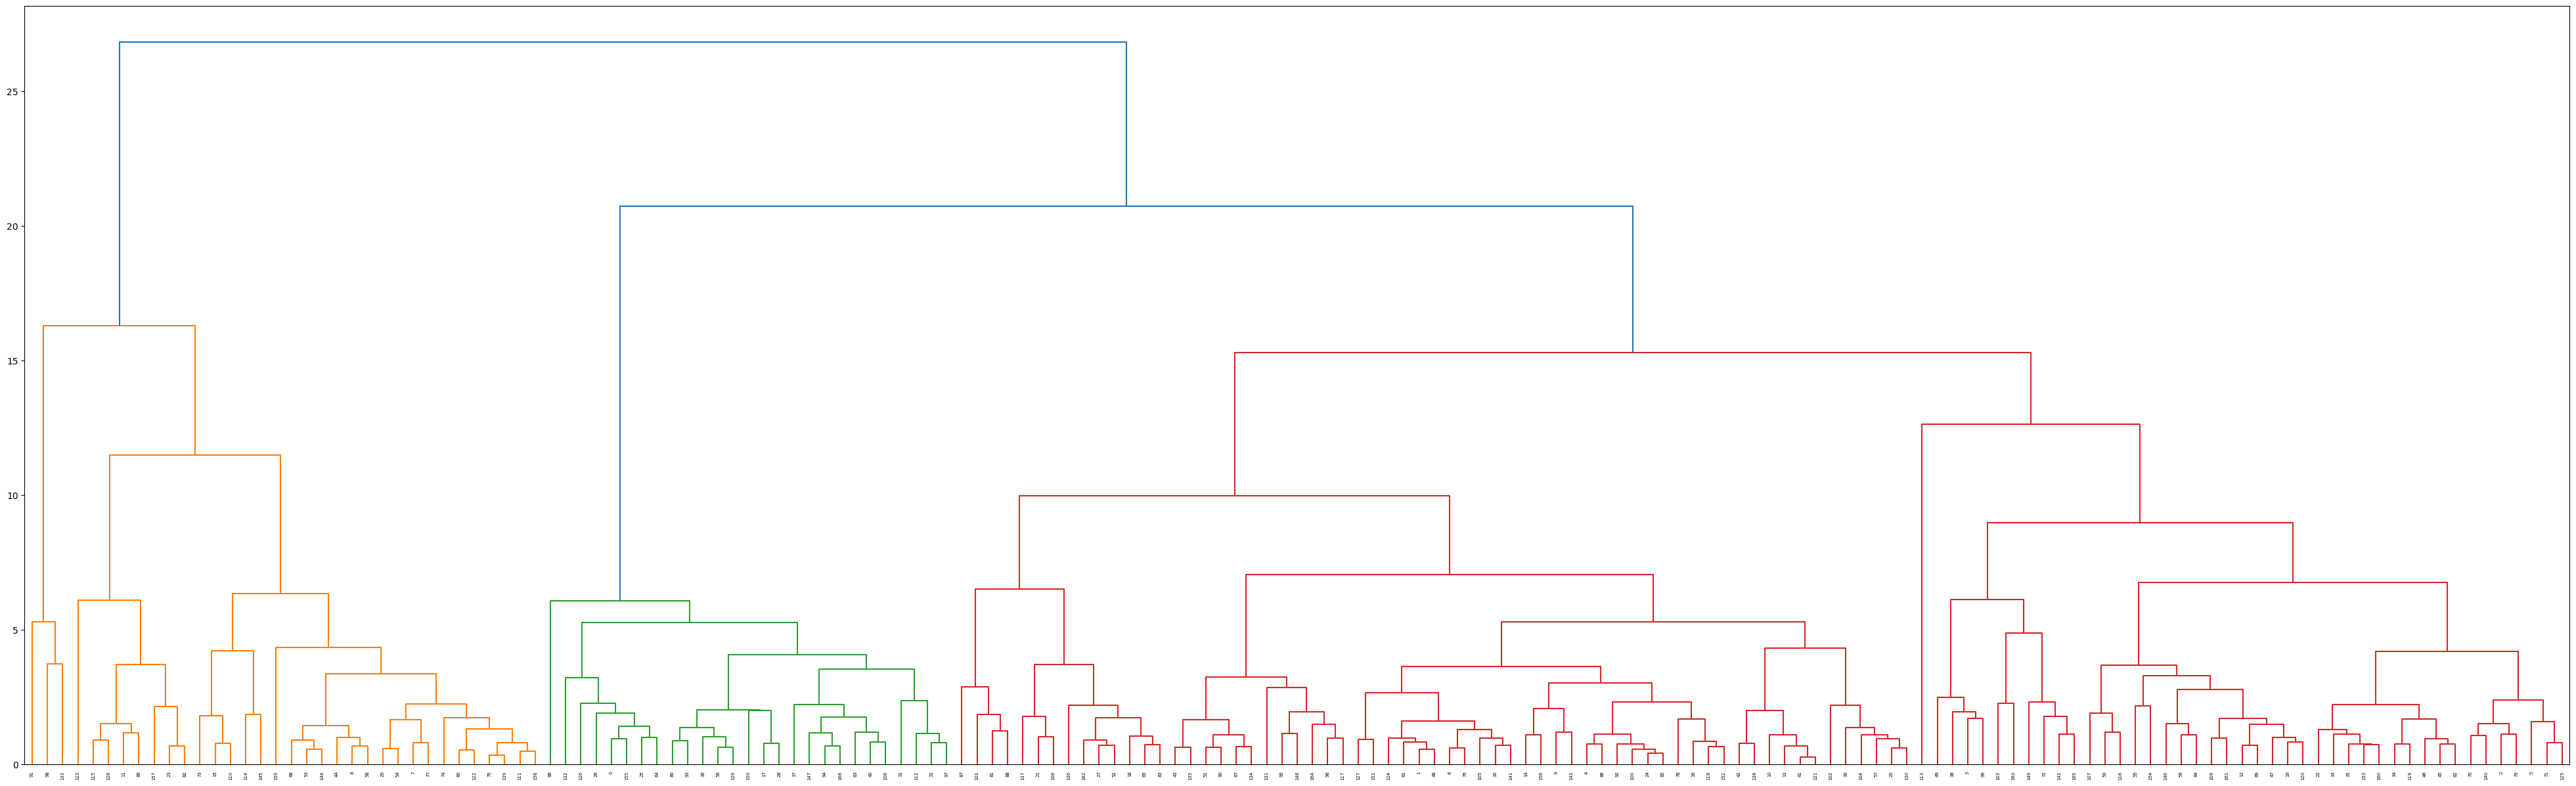

In [26]:
plt.figure(figsize=(50,15))
dend=hcluster.dendrogram(hcluster.linkage(Scal_df,method='ward'))

In [29]:
hcluster=AgglomerativeClustering(n_clusters=3,linkage='ward')

In [30]:
hcluster.fit_predict(Scal_df)

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [32]:
hcluster_label=hcluster.labels_

In [33]:
data['target']=hcluster_label

In [34]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,target
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [35]:
data[data['country']=="Egypt"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,target
47,Egypt,29.1,21.3,4.66,26.6,9860,10.1,70.5,3.19,2600,1


In [36]:
data['country'][data['target']==0]

7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
89                    Libya
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
115                    Oman
122                Portugal
123                   Qatar
128            Saudi Arabia
133               Singapore
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object